In [1]:
#import libraries
import tensorflow
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
from tensorflow.keras.callbacks import Callback
import numpy as np
import matplotlib.pyplot as plt

In [2]:
##dataset downloadind and normalizing
(X_image_train, y_label_train),(X_image_test,y_label_test) = mnist.load_data()

X_image_train = X_image_train.astype('float32')/255
X_image_test = X_image_test.astype('float32')/255

X_image_train =X_image_train.reshape((len(X_image_train), 784))
X_image_test =X_image_test.reshape((len(X_image_test), 784))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Epoch 1/90
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0617 - val_loss: 0.0456
Epoch 2/90
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0439 - val_loss: 0.0352
Epoch 3/90
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0341 - val_loss: 0.0320
Epoch 4/90
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0315 - val_loss: 0.0298
Epoch 5/90
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0294 - val_loss: 0.0287
Epoch 6/90
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0285 - val_loss: 0.0282
Epoch 7/90
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0279 - val_loss: 0.0277
Epoch 8/90
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0275 - val_loss: 0.0274
Epoch 9/90
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0272 - val_loss: 0.0270
Epoch 10/90
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0268 - val_loss: 0.0268
Epoch 11/90
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0267 - val_loss: 0.0267
Epoch 12/90
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/s

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │           1,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 611,402 (2.33 MB)

 Trainable params: 203,800 (796.09 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 407,602 (1.55 MB)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,512 (396.53 KB)

 Trainable params: 101,512 (396.53 KB)

 Non-trainable params: 0 (0.00 B)

Number of Encoder Parameters= 101512 Number of Decoder Parameters= 102288 Number of Autoencoder Parameters= 203800


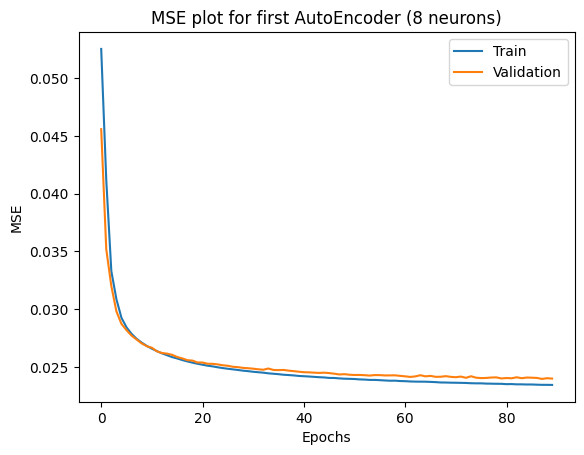

In [3]:
#autoencoder first part
#first model
#auto_encoder
inputLayer_size = 784
hiddenLayer_size = 128
latentLayer_size = 8

#encoder + decoder
input_img = Input(shape = (inputLayer_size,))
hiddenLayer_encoder = Dense(hiddenLayer_size, activation = "relu")(input_img)
latentLayer = Dense(latentLayer_size, activation = "relu")(hiddenLayer_encoder)
hiddenLayer_decoder = Dense(hiddenLayer_size, activation = "relu")(latentLayer)
output_layer = Dense(inputLayer_size, activation = "linear")(hiddenLayer_decoder)


autoencoder1 = Model(input_img, output_layer)
encoder1 = Model(input_img, latentLayer)


autoencoder1.compile(optimizer = "adam", loss = "MSE")
history=autoencoder1.fit(X_image_train, X_image_train, epochs=90, shuffle =True, validation_split =0.2 ,batch_size=128)


##autoencoder,##Results part
##Number of parameters
autoencoder1.summary()
encoder1.summary()
encoder_Nparameters=encoder1.count_params()
autoencoder_Nparameters=autoencoder1.count_params()
decoder_Nparameters=autoencoder_Nparameters-encoder_Nparameters
print("Number of Encoder Parameters=",encoder_Nparameters ,"Number of Decoder Parameters=",decoder_Nparameters,"Number of Autoencoder Parameters=",autoencoder_Nparameters)

# MSE plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('MSE plot for first AutoEncoder (8 neurons)')
plt.legend(['Train', 'Validation'])
plt.show()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 86 (344.00 B)

 Trainable params: 86 (344.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/90
366/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0980 - loss: 3.6273Epoch 1: Test Accuracy = 0.1291
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0981 - loss: 3.6073 - val_accuracy: 0.1323 - val_loss: 2.2390
Epoch 2/90
372/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1486 - loss: 2.1972Epoch 2: Test Accuracy = 0.2392
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1490 - loss: 2.1966 - val_accuracy: 0.2400 - val_loss: 2.0224
Epoch 3/90
363/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2627 - loss: 1.9677Epoch 3: Test Accuracy = 0.3803
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2641 - loss: 1.9655 - val_accuracy: 0.3808 - val_loss: 1.7620
Epoch 4/90
356/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4046 - loss: 1.7043Epoch 4: Test Accuracy = 0.4914
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4061 - loss: 1.7008 - val_accuracy: 0.4856 - val_loss: 1.4935
Epoch 5/90
370/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 

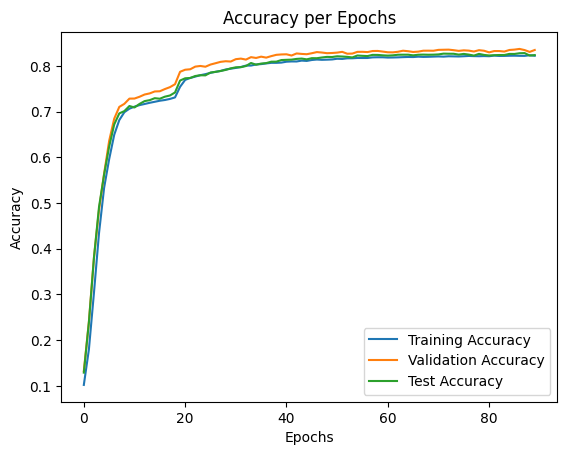

In [5]:
##encoder 1+classification
##input
encodedInput_x_train=encoder1.predict(X_image_train)
encodedInput_x_test=encoder1.predict(X_image_test)
##making labels categorical
encoder_label_train=keras.utils.to_categorical(y_label_train,10)
encoder_label_test=keras.utils.to_categorical(y_label_test,10)

##feedForward classification
latent_1 = Input(shape = (latentLayer_size,))
classlayer_1 = Dense(4,activation="relu")(latent_1)
classlayer_2 = Dense(10,activation="softmax")(classlayer_1)

classifierWithEncoder_1 = Model(latent_1, classlayer_2)
classifierWithEncoder_1.summary()

classifierWithEncoder_1.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

class TestAccuracyCallback(Callback):
    def __init__(self, X_test, y_test):
        self.X_test = X_test
        self.y_test = y_test
        self.test_accuracies = []

    def on_epoch_end(self, epoch, logs=None):
        test_loss, test_acc = self.model.evaluate(self.X_test, self.y_test, verbose=0)
        self.test_accuracies.append(test_acc)
        print(f"Epoch {epoch+1}: Test Accuracy = {test_acc:.4f}")

# Initialize Callback
test_accuracy_callback = TestAccuracyCallback(encodedInput_x_test,encoder_label_test)
history_classifier = classifierWithEncoder_1.fit(encodedInput_x_train, encoder_label_train, epochs=90, batch_size=128, validation_split=0.2,callbacks=[test_accuracy_callback])


# Classification Accuracy (Train & Test) vs. Epochs
plt.plot(history_classifier.history['accuracy'], label='Training Accuracy')
plt.plot(history_classifier.history['val_accuracy'], label='Validation Accuracy')
plt.plot(test_accuracy_callback.test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epochs')
plt.legend()
plt.show()


